In [0]:
import numpy as np
import math
import scipy.linalg
import scipy as sp
import matplotlib.pyplot as plt

We define a function to normalize our state to preserve the $l_{2}$ norm.

In [0]:
NormalizeState = lambda state: state / sp.linalg.norm(state)
Id = np.eye(2)

In [0]:
def hadamard_test(U,psi):
  # initialize the hadamard gate
  hadamard_gate = 1./np.sqrt(2) * np.array([[1, 1],
                                     [1, -1]])
  
  zero = np.array([1,0])
  one = np.array([0,1])
  
  # Apply H to first qubit
  anc1 = np.dot(hadamard_gate, zero)

  state = np.kron(anc1, psi)
  
  # Construct the Controlled Gate
  gate = np.identity(4)
  gate[2:,2:] = U
  state = np.dot(gate, state)
  
  # Apply H to first qubit
  h_matrix = np.kron(hadamard_gate, Id)
  state = np.dot(h_matrix, state)
 
  # get Projectore for measurement
  p0 = np.kron(np.outer(zero, zero.T), Id)
  p1 = np.kron(np.outer(one, one.T), Id)
  
  measure0 = np.dot(p0, state)
  measure1 = np.dot(p1, state)
  
  probability0 = np.dot(measure0, measure0.T)
  probability1 = np.dot(measure1, measure1.T)
  
  return [probability0, probability1]


  Lets initialize U to be the X operator  \\
  $U= \begin {pmatrix}0 & 1 \\ 1 & 0 \end{pmatrix} $


In [0]:
U = np.array([[0,1],[1,0]])

Now lets initialize the $\psi$ state. The overall state is \begin{equation*}\frac{1}{\sqrt(2)}(|0⟩
 + |1⟩)\end{equation*}
 which is also the $|+⟩$ state

In [0]:
zero_state = np.array([1,0])
one_state = np.array([0,1])  

Now we call the hadamard function, first with $\psi = \frac{(|0⟩ + |1⟩)}{\sqrt{2}}$ and then with $\psi = \frac{(|0⟩ - |1⟩)}{\sqrt{2}}$

In [62]:
psi = NormalizeState(zero_state + one_state)
res = hadamard_test(U, psi)
print("Result for |+>: ")
print(res)

psi = NormalizeState(zero_state - one_state)
res = hadamard_test(U, psi)
print("Result for |->: ")
print(res)


Result for |+>: 
[0.9999999999999996, 0.0]
Result for |->: 
[0.0, 0.9999999999999996]


Now we get the probabilities for $U = diag(1,e^{2\pi i \phi}$ for $\phi = [0,1)$ and $\psi = |1⟩$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


Text(0.5, 1.0, 'Hadamard test probabilies for $U=diag(1,exp^{2\\pi i\\varphi}$ and $\\psi$ = |1>')

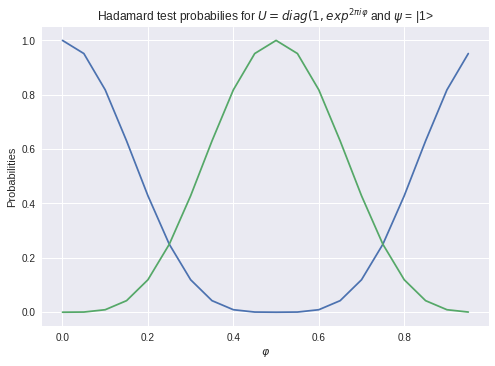

In [81]:
phi = np.arange(0.0, 1.0, 0.05)
p0_array = np.zeros(len(phi))
p1_array = np.zeros(len(phi))

psi = one_state

for i in range(0,len(phi)):
  U = np.diag([1, np.exp(2*np.pi*1j*phi[i])])
  temp = hadamard_test(U, psi)
  p0_array[i] = temp[0]
  p1_array[i] = temp[1]
  
plt.plot(phi, p0_array, phi, p1_array)
plt.xlabel('$\\varphi$')
plt.ylabel('Probabilities')
plt.title('Hadamard test probabilies for $U=diag(1,exp^{2\pi i\\varphi}$ and $\psi$ = |1>')